# Download libraries 

In [2]:
!pip3 install -U --quiet scikit-learn==1.3.2 pandas==2.0.3 matplotlib

In [ ]:
!pip3 install --quiet torch==2.4.0 torchvision torchaudio

Check that the right CUDA and torch versions are installed to ensure compatibility in case of errors: https://pytorch.org/get-started/previous-versions/

In [4]:
%%bash
python -c "import torch; print(torch.__version__)"

2.4.1+cu121


In [5]:
%%bash
python -c "import torch; print(torch.version.cuda)"

12.1


In [6]:
!pip3 install --quiet torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://pytorch-geometric.com/whl/torch-2.4.0+cu121.html

In [7]:
!pip3 install --quiet torch-geometric

# Load and prepare all the data

In [12]:
# Import necessary libraries
import os
import sys
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch_geometric.data import Data
import torch.nn.functional as F

from sklearn.model_selection import KFold
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay, 
                             roc_curve, roc_auc_score, RocCurveDisplay, 
                             average_precision_score, auc, confusion_matrix)

In [2]:
# Define data path and cancer type parameters
cancer_names = ["blca", "brca", "coad", "hnsc", "ucec"]
cancer_type = cancer_names[0]

# Neural network parameters
SEED = 32
n_edges = 267186

In [3]:
# Helper functions to load the node features and save the mapping

def load_node_csv(path, index_col, encoders=None, **kwargs):
    """
    Load node features from a CSV file.

    Parameters:
    - path (str): Path to the CSV file
    - index_col (int): Column to use as the index for the dataframe

    Returns:
    - x (DataFrame): Loaded feature data
    - mapping (dict): Dictionary mapping gene names to indices
    """
    df = pd.read_csv(path, index_col=index_col, header=None)
    mapping = {index: i for i, index in enumerate(df.index.unique())}
    x = df.iloc[:, 0:]
    return x, mapping


def save_mapping_json(mapping_file):
    """
    Save gene mapping as a JSON file.

    Parameters:
    - mapping_file (dict): Dictionary mapping gene names to indices
    """
    with open('gene_mapping.json', 'w') as outfile:
        json.dump(mapping_file, outfile)

In [ ]:
def read_files():
    """
    Read data files and create a PyTorch dataset.

    Returns:
    - compact_data (Data): PyTorch Geometric Data object containing gene data
    - driver_ids (DataFrame): Dataframe of driver gene IDs
    - passenger_ids (DataFrame): Dataframe of passenger gene IDs
    - gene_features (DataFrame): Dataframe of gene features
    - mapping (dict): Dictionary mapping gene names to indices
    """

    # TODO: read the raw data files with pandas

    

    # TODO:  Display loaded data for verification

    # TODO: Prepare driver and passenger gene lists

    # TODO: Load node features and mapping

    # TODO: Initialize target labels

    # TODO: Assign labels: driver = 1, passenger = 0

    # TODO: Display counts of labeled nodes

    # TODO: Save mapping to JSON

    # TODO: Process edges and replace gene names with IDs

    # TODO: Convert data to appropriate formats for PyTorch

    # TODO: Create PyTorch Geometric Data object and assign labels
    
    # TODO: return the created objects

In [5]:
# Read the files and create the pytoch dataset using the function defined above
compact_data, driver_ids, passenger_ids, gene_features, mapping = read_files()

Paths used: blca
Driver genes:
         0
0  ARID1A
1   ASXL2
2     ATM
3  CDKN1A
4  CDKN2A 

Passenger genes:
         0
0     A2M
1   ABCF3
2  ABHD10
3  ABHD11
4  ABHD13 

Gene embeddings:
        0         1         2         3    4    5         6    7         8   \
0    A1BG  0.181818  0.181818  0.090909  0.0  0.0  0.090909  0.0  0.090909   
1     A2M  0.263158  0.578947  0.157895  0.0  0.0  0.000000  0.0  0.000000   
2   A2ML1  0.315789  0.578947  0.000000  0.0  0.0  0.000000  0.0  0.052632   
3  A4GALT  0.666667  0.000000  0.000000  0.0  0.0  0.333333  0.0  0.000000   
4    AAAS  0.000000  0.800000  0.000000  0.0  0.0  0.000000  0.0  0.200000   

         9         10        11        12  
0  1.000000  0.222222  2.000000  0.774243  
1  0.454545  0.357143  1.717376  1.386782  
2  0.545455  0.461538  1.947443  1.529388  
3  0.000000  2.000000  0.000000  1.000000  
4  0.000000  0.000000  2.000000  1.800000   

Gene links:
       0       1
0  A1BG   PRDX4
1   A2M  KIFAP3
2   A2M   DD

# Define, train, and evaluate the model

First check the class distribution of our labels

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

51 51
[-1, 0, 1] [10902, 2303, 51]


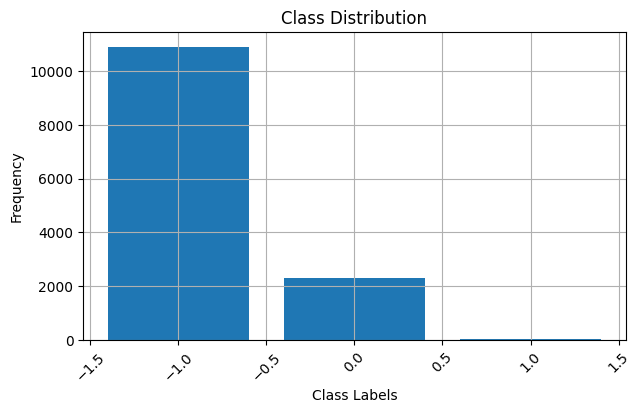

In [ ]:

"""
Check out the class distribution
"""
def plot_class_distribution(labels):
    print(len([i for i in compact_data.y if i == 1]), len(driver_ids[0].tolist()))
    counter = Counter(labels)
    classes = list(counter.keys())
    counts = list(counter.values())
    print(classes, counts)
    
    # Plotting the distribution
    plt.figure(figsize=(7, 4))
    plt.bar(classes, counts)
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_class_distribution(compact_data.y.numpy())

Next, we will define our models then train and evaluate them. We will also produce plots based on these.

First, define helper functions for plotting our evaluation metrics. Complete the TODOs to create the following plots with `matplotlib`:

1) Precision-recall curve
2) ROC curve
3) Training loss and accuracy across epochs
4) Confusion matrix (TPs, TNs, FPs, FNs)

In [ ]:
# Helper function to plot precision recall curve
def plot_precision_recall(dr_prec, dr_recall, cancer_type, auprc):
    """
    Plot Precision-Recall curve for the model.

    Parameters:
    dr_prec (array): Precision values.
    dr_recall (array): Recall values.
    cancer_type (str): Type of cancer being analyzed.
    auprc (float): Area under the precision-recall curve.
    """
    # TODO: Plot Precision-Recall curve

In [ ]:
def plot_roc_curve(fpr, tpr, cancer_type):
    """
    Plot ROC curve for the model.

    Parameters:
    fpr (array): False positive rate values.
    tpr (array): True positive rate values.
    cancer_type (str): Type of cancer being analyzed.
    """
    # TODO: Plot ROC curve

In [ ]:
def plot_loss_accuracy(n_epochs, tr_loss, te_acc, acc_title="Accuracy over Epochs", loss_title="Loss over Epochs"):
    """
    Plot training loss and test accuracy across epochs.

    Parameters:
    n_epochs (int): Number of epochs.
    tr_loss (list): Training loss values.
    te_acc (list): Test accuracy values.
    acc_title (str): Title for accuracy plot.
    loss_title (str): Title for loss plot.
    """

    # TODO: Plot training loss and test accuracy over epochs

In [ ]:
def plot_confusion_matrix(true_labels, pred_labels, classes=['Passengers', 'Drivers']):
    """
    Plot a normalized confusion matrix.

    Parameters:
    true_labels (array): True labels of the data.
    pred_labels (array): Predicted labels from the model.
    classes (list): List of label names.
    """
    # TODO: plot confusion matrix with sklearn.metrics and seaborn

Next we will define the HPs used for our model and then define a GCN and GAT model using PyTorch functional as in previous exercises.

In [14]:
# Define hyperparameters
from torch.nn import Linear
from torch_geometric.nn import GCNConv, GATConv
from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold

kfold_re = 10
k_folds = 5
batch_size = 32
num_classes = 2
gene_dim = 12
learning_rate = 0.001
dropout = 0.2

In [ ]:
# Define the GCN model 
class GCN(torch.nn.Module):
    '''
    Neural network with graph convolution network (GCN)
    '''
    # TODO: define the layers of the GCN model and implement the forward pass

In [ ]:
# Define the GAT model
class GAT(torch.nn.Module):
    '''
    Neural network with graph attention network (GAT)
    '''
    # TODO: define the layers of the GAT model and implement the forward pass

Finally, we define the training helper functions:

1) Train the actual model with backpropagation on the training data
2) Create a boolean mask
3) Sample genes
4) Compute the evaluation metrics

In [ ]:
# Define the training function

def train_model(data, optimizer, model):
    """
    Performs a single training step, including forward pass, 
    loss computation, backpropagation, and optimizer step.
    
    Parameters:
    - data: Input batch data with features, labels, and masks.
    - optimizer: Optimizer for updating model weights.
    - model: The model being trained.
    
    Returns:
    - train_loss: Computed training loss for the batch.
    """
    # TODO: implement the training step of the model

In [ ]:
# Helper function to create a boolean mask 
def create_masks(total_elements, mask_indices):
    """
    Creates a boolean mask tensor with True values at specified indices.
    
    Parameters:
    - total_elements: Total number of elements in the mask.
    - mask_indices: List of indices to set as True in the mask.
    
    Returns:
    - mask: A boolean tensor with specified indices set to True.
    """
    # TODO: create boolean mask

In [ ]:
# Helper function to sample genes 
def sample_genes(gene_set, target_size):
    """
    Samples genes to balance the batch size between classes.
    If the gene set is smaller than the target size, oversampling is applied.
    
    Parameters:
    - gene_set: Array of gene indices for a particular class.
    - target_size: Number of samples required for the batch.
    - batch_size: Total size of the batch.
    - num_classes: Number of classes in the dataset.
    
    Returns:
    - sampled_genes: List of sampled genes for the batch.
    """
    # TODO: implement gene sampling with oversampling if needed
    

In [ ]:
# Helper function to compute evaluation metrics
def compute_metrics(model, data, mask_type):
    """
    Evaluates the model and computes various metrics including 
    loss, accuracy, AUPRC, and ROC AUC.
    
    Parameters:
    - model: The trained model to evaluate.
    - data: Input data containing features, labels, and masks.
    - mask_type: Mask type (e.g., test/validation) for evaluation.
    
    Returns:
    - test_loss: Loss computed over the specified mask.
    - test_accuracy: Accuracy on the masked data.
    - test_roc_auc: Area under the ROC curve score.
    - test_auprc: Area under the precision-recall curve.
    - output: Predicted class outputs.
    - logits: Raw model output scores.
    """
    # TODO: implement the evaluation metrics computation

Now we use the helper functions previously defined to implement the final function to train the models with cross-validation and then produce the plots we mentioned previously using the helper functions. The final result should be close to this:

Final Evaluation on Unseen Test Data
Test AUPRC: 0.26270961081684796, Loss: 0.46854313313961027, Accuracy: 0.7365161269903183

In [ ]:
# TODO: implement the training process with cross-validation
def create_training_process(compact_data, driver_ids, passenger_ids, gene_features, mapping, weight_decay=0.0005):
    '''
    Initialize network architecture, assign loss functions, optimizers, and create cross-validation pipeline
    '''

    # TODO: Initialize model

    # TODO: Define optimizer

    # TODO: Map gene IDs to integers

    # TODO: Balance data size for each class in batches

    # TODO: Shuffle and split driver and passenger IDs for training and testing
    
    # TODO: Create test masks

    # TODO: Initialize performance tracking lists

    # TODO: Set up k-fold cross-validation

    # TODO: Implement cross-validation loop
    for fold, (driver_train_indices, passenger_train_indices) in enumerate(zip(kfold.split(train_driver_ids), kfold.split(train_passenger_ids))):
        
        print(f"Training fold {fold + 1}/{total_folds}")
        # TODO: extract training and test IDs for drivers and passengers

        # TODO: Prepare test genes for the fold

        # TODO: create test mask for evaluation each fold

        # TODO: Implement batch training loop
        batch_losses = []
        for _ in range(num_batches):
            # TODO: sample driver and passenger genes

            # TODO: concatenate driver and passenger genes to create a training batch

            # TODO: train model on batch training data

        metrics_tracking["train_loss"].append(np.mean(batch_losses))

        # TODO: Implement fold evaluation

        # TODO: Evaluation on unseen data

    # TODO: Implement final evaluation on unseen data
    

    # Plot results
    plot_precision_recall(final_precision, final_recall, cancer_type, fold_metrics[3])
    plot_roc_curve(final_fpr, final_tpr, cancer_type)
    plot_confusion_matrix(compact_data.y[test_mask].cpu().detach().numpy(), final_metrics[4][test_mask].cpu().detach().numpy())
    plot_loss_accuracy(total_folds, metrics_tracking["test_loss"], metrics_tracking["test_accuracy"], "Unseen Data: Accuracy vs Folds", "Unseen Data: Loss vs Folds")
    plot_loss_accuracy(total_folds, metrics_tracking["fold_test_loss"], metrics_tracking["fold_test_accuracy"], "Fold Test: Accuracy vs Folds", "Fold Test: Loss vs Folds")

Training fold 1/50
Fold 1/50 - Training Loss: 0.6180034279823303, Test Loss: 0.7379755973815918, Test Acc: 0.34810125827789307, ROC AUC: 0.8982894128525196, AUPRC: 0.14152034082175596
Unseen Data - Test Loss: 0.7254104018211365, Test Acc: 0.3767741918563843, ROC AUC: 0.901268115942029, AUPRC: 0.33679263818382615
-------
Training fold 2/50
Fold 2/50 - Training Loss: 0.5822310447692871, Test Loss: 0.6121218800544739, Test Acc: 0.5094936490058899, ROC AUC: 0.9246417013407304, AUPRC: 0.1792380660195608
Unseen Data - Test Loss: 0.6428889036178589, Test Acc: 0.47612902522087097, ROC AUC: 0.8982213438735178, AUPRC: 0.25757141082097684
-------
Training fold 3/50
Fold 3/50 - Training Loss: 0.5471087098121643, Test Loss: 0.5301834940910339, Test Acc: 0.6044303774833679, ROC AUC: 0.9889042995839112, AUPRC: 0.7002255447633599
Unseen Data - Test Loss: 0.5790610313415527, Test Acc: 0.5896773934364319, ROC AUC: 0.9040678524374177, AUPRC: 0.18984881189165054
-------
Training fold 4/50
Fold 4/50 - Trai

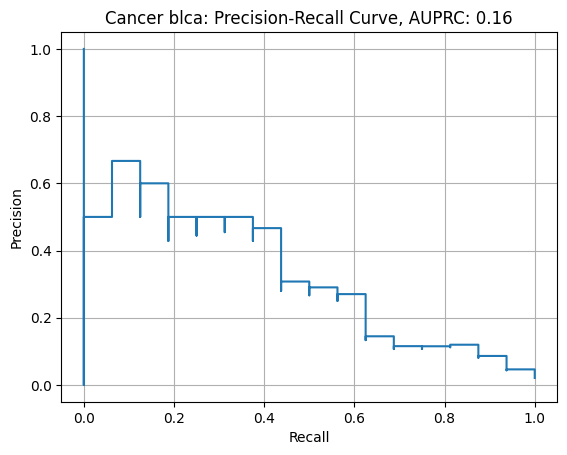

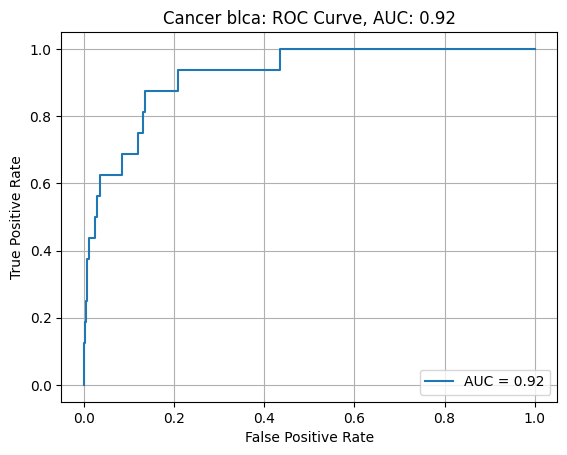

NameError: name 'sns' is not defined

<Figure size 700x700 with 0 Axes>

In [22]:
# Run the training process defined above (includes plotting functions)
create_training_process(compact_data, driver_ids, passenger_ids, gene_features, mapping)

## Further research

- [deepDriver: Predicting Cancer Driver Genes Based on Somatic Mutations Using Deep Convolutional Neural Networks](https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2019.00013)
- [Network-based prediction approach for cancer-specific driver missense mutations using a graph neural network](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-023-05507-6)
- [Cancer driver gene discovery in transcriptional regulatory networks using influence maximization approach](https://www.sciencedirect.com/science/article/pii/S0010482519302392)
- [Prediction of Cancer Driver Genes with Graph Neural Networks](https://lume.ufrgs.br/bitstream/handle/10183/261761/001172481.pdf;jsessionid=1816F89F9BED22F569699355E1433355?sequence=1)
- 